In [45]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

import itertools
from scipy import linalg
import matplotlib as mpl

from ChernoffFace import *
import matplotlib.cm

from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

from clusterian import misc
from clusterian import gaussian_mixture as GM

# RNA-seq data
The number of component and type of Gaussian mixture is chosen to maximise the score.

In [43]:
rna = pd.read_csv("../data/RNAseqData.csv", index_col = 0).transpose()
rna.shape

(14809, 200)

In [46]:
rna_scores, rna_gmms = GM.choose_cv_type(rna, n_components_range = [150, 200, 250, 300], 
                                         cv_types = ["spherical", "tied", "diag", "full"], 
                                         save_gmms=True, file_name='./GM_rna_cvtests.txt')


 spherical
300 ok / 250 ok / 200 ok / 150 ok / 
 tied
300 ok / 250 ok / 200 ok / 150 ok / 
 diag
300 ok / 250 ok / 200 ok / 150 ok / 
 full
300 ok / 250 ok / 200 ok / 150 ok / 

In [47]:
rna_scores

,300,250,200,150
spherical,-148.985697,-151.821168,-154.460502,-157.508547
tied,-109.277395,-111.011794,-112.624171,-114.719020
diag,-126.255023,-129.060497,-132.295412,-136.194581
full,722.670468,649.428147,554.825524,402.278068


In [51]:
rna_gmms_np = np.array(rna_gmms)
rna_gmms_np

array([['spherical', 300,
        GaussianMixture(covariance_type='spherical', n_components=300, n_init=10)],
       ['spherical', 250,
        GaussianMixture(covariance_type='spherical', n_components=250, n_init=10)],
       ['spherical', 200,
        GaussianMixture(covariance_type='spherical', n_components=200, n_init=10)],
       ['spherical', 150,
        GaussianMixture(covariance_type='spherical', n_components=150, n_init=10)],
       ['tied', 300,
        GaussianMixture(covariance_type='tied', n_components=300, n_init=10)],
       ['tied', 250,
        GaussianMixture(covariance_type='tied', n_components=250, n_init=10)],
       ['tied', 200,
        GaussianMixture(covariance_type='tied', n_components=200, n_init=10)],
       ['tied', 150,
        GaussianMixture(covariance_type='tied', n_components=150, n_init=10)],
       ['diag', 300,
        GaussianMixture(covariance_type='diag', n_components=300, n_init=10)],
       ['diag', 250,
        GaussianMixture(covariance_type

In [73]:
rna_gmms_np_full = rna_gmms_np[rna_gmms_np[:,0]=='full',:]
GM_rna_200_full = rna_gmms_np_full[rna_gmms_np_full[:,1]==200,-1][0]

In [79]:
GM_rna_200_full = GM_rna_200_full.fit(rna)

In [81]:
GM_rna_200_full_lab = GM_rna_200_full.predict(rna)

In [82]:
GM_rna_200_full_mm = misc.lab2mat(GM_rna_200_full_lab, rna.index)

In [83]:
GM_rna_200_full_mm.to_csv('./MembMatrix/GM_rna_200_full.csv', header=False, index=True)

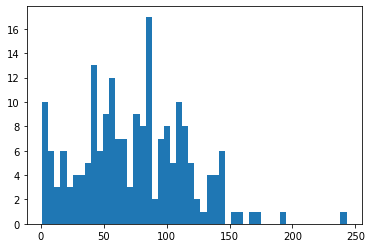

In [90]:
plt.hist(np.sum(GM_rna_200_full_mm, axis=0),bins=50);

# Gene2vec data./MembMatrix/

In [5]:
g2v = pd.read_csv("../data/gene2vec_dim_200_iter_9.csv", index_col=0)
g2v.columns = range(200)

In [6]:
g2v_tsne = pd.read_csv("../data/gene2vec_TSNE.csv", header=None)

In [13]:
from sklearn.decomposition import PCA

In [15]:
g2v_pca = PCA().fit(g2v)

In [20]:
g2v_pca_cumExpVar = np.cumsum(g2v_pca.explained_variance_)/sum(g2v_pca.explained_variance_)

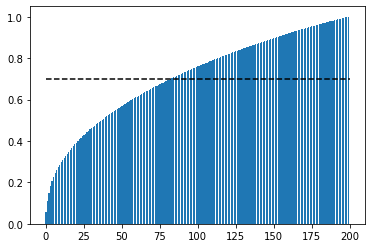

In [142]:
y_pos = np.arange(len(g2v_pca_cumExpVar))
plt.bar(y_pos, g2v_pca_cumExpVar)
cut = 0.7
plt.hlines(cut, xmin=0, xmax=200, linestyle='--', color='black')

In [143]:
n_comp = np.where(cut-g2v_pca_cumExpVar<0)[0][0]
n_comp

83

In [144]:
g2v_reduc = pd.DataFrame([g2v.dot(g2v_red.components_[i]) for i in range(n_comp)], columns=g2v.index).T

In [145]:
g2v_reduc.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,,,,,,,,,,,,,,,,,,,,,
PLAC4,1.103687,0.435042,0.385236,0.421444,0.589411,0.357090,-0.068539,0.242766,-0.029793,-0.111253,...,0.083117,0.230211,0.085055,0.149091,-0.015927,0.167168,-0.193964,-0.007057,-0.064814,-0.163552
RPS2P45,0.225113,1.334689,0.757718,-1.063397,0.680526,0.239146,-0.508352,0.496775,0.368928,0.763367,...,0.194832,0.231102,-0.117170,-0.166360,-0.137722,-0.083952,-0.144458,-0.296308,-0.064554,0.338151
C3orf18,0.913489,0.391021,0.507961,0.565329,-0.648649,0.310312,0.208909,0.080663,-0.128431,-0.360403,...,0.134352,0.025022,-0.038825,0.092582,0.147981,0.085022,-0.127692,-0.123833,-0.007816,-0.009723
C6orf226,0.134083,0.487695,0.500991,1.131057,-0.585935,0.099088,0.106828,-0.670538,0.219842,0.451775,...,0.076881,0.108185,-0.070084,0.038054,-0.088891,0.133328,-0.219488,0.037027,0.122128,-0.161121
CISD3,0.037713,0.552663,0.409324,0.782428,-0.658833,0.135300,0.717969,-0.236828,0.145621,0.145321,...,-0.213398,-0.266916,-0.059416,-0.171048,0.137170,0.087051,-0.053630,-0.142208,0.048892,0.150732


In [146]:
lowest_bic = np.infty
pca_bic = []
n_components_range = [200, 250, 300, 350]
n_components_range.reverse()
cv_types = ["spherical", "tied", "diag", "full"]
gmms = []
for cv_type in cv_types:
    print('\n',cv_type)
    for n_components in n_components_range:
        print(n_components, end = ' ')
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type, init_params= "kmeans", n_init=10)
        gmm.fit(g2v_reduc)
        gmms.append(gmm)
        #pca_bic.append(gmm.bic(g2v_reduc))
        #if pca_bic[-1] < lowest_bic:
        #    lowest_bic = pca_bic[-1]
        #    pca_best_gmm = gmm
        print("ok", end = ' / ')


 spherical
350 ok / 300 ok / 250 ok / 200 ok / 
 tied
350 ok / 300 ok / 250 ok / 200 ok / 
 diag
350 ok / 300 ok / 250 ok / 200 ok / 
 full
350 ok / 300 ok / 250 ok / 200 ok / 

In [184]:
n_components_range = np.linspace(200,400,20,dtype=int).tolist()
n_components_range.reverse()
gmms_full = []
cv_type = "full"

for n_components in n_components_range:
    print(n_components, end = ' ')
    # Fit a Gaussian mixture with EM
    gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type, init_params= "kmeans", n_init=10)
    gmm.fit(g2v_reduc)
    gmms_full.append(gmm)
    #pca_bic.append(gmm.bic(g2v_reduc))
    #if pca_bic[-1] < lowest_bic:
    #    lowest_bic = pca_bic[-1]
    #    pca_best_gmm = gmm
    print("ok", end = ' / ')

400 ok / 389 ok / 378 ok / 368 ok / 357 ok / 347 ok / 336 ok / 326 ok / 315 ok / 305 ok / 294 ok / 284 ok / 273 ok / 263 ok / 252 ok / 242 ok / 231 ok / 221 ok / 210 ok / 200 ok / 

In [180]:
import pickle

In [181]:
file = open("GM_g2v_pca_83_cvtests.txt", "wb")
pickle.dump([gmms, cv_types, n_components_range, g2v_reduc], file)
file.close()

In [185]:
file = open("GM_g2v_pca_83_fullncomptests.txt", "wb")
pickle.dump([gmms_full, n_components_range, g2v_reduc], file)
file.close()

In [150]:
pca_score = []
for gmm in gmms:
    #print(gmm)
    s = gmm.score(g2v_reduc)
    pca_score.append(s)

In [188]:
full_score = []
full_bic = []
full_aic = []
for gmm in gmms_full:
    full_score.append(gmm.score(g2v_reduc))
    full_bic.append(gmm.bic(g2v_reduc))
    full_aic.append(gmm.aic(g2v_reduc))

In [190]:
pd.DataFrame([full_score,full_bic,full_aic], index=["Score","BIC","AIC"], columns=n_components_range).T

,Score,BIC,AIC
400,104.841596,9.302752e+06,-2.270127e+06
389,99.049925,9.189136e+06,-2.065489e+06
378,97.857057,8.850665e+06,-2.085705e+06
368,97.510517,8.506887e+06,-2.140161e+06
357,95.750849,8.196130e+06,-2.132664e+06
347,91.823305,8.027441e+06,-2.012031e+06
336,91.032690,7.669303e+06,-2.051914e+06
326,89.567132,7.380238e+06,-2.051657e+06
315,89.074050,7.007552e+06,-2.106089e+06
305,85.299850,6.831366e+06,-1.992953e+06


In [151]:
score_df = pd.DataFrame(np.array(pca_score).reshape((4,4)), index=cv_types, columns=n_components_range)

In [152]:
score_df

,350,300,250,200
spherical,8.867769,7.954574,7.054264,5.906676
tied,6.927678,5.671031,4.469847,2.960635
diag,14.427522,13.468540,12.573255,11.586694
full,94.039819,85.369418,76.037130,68.076701


The log likelyhood is clearly maximized with convergence of type `'full'` and a higher number of components.

In [154]:
pca_score = np.array(pca_score)

In [156]:
np.argmax(pca_score)

12

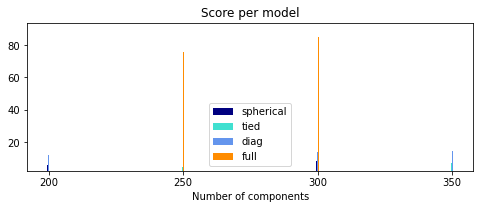

In [158]:
pca_score = np.array(pca_score)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange", 
                              "orangered", "palegreen","pink","violet","silver","mediumseagreen",
                             "lightcoral"])
clf = gmms[np.argmax(pca_score)]
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            pca_score[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([pca_score.min() * 1.01 - 0.01 * pca_score.max(), pca_score.max()])
plt.title("Score per model")
xpos = (
    np.mod(pca_score.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(pca_score.argmin() / len(n_components_range))
)
#plt.text(xpos, pca_bic.min() * 0.97 + 0.03 * pca_bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

In [65]:
bic.argmin()

10

In [66]:
clf.covariance_type

'diag'

In [67]:
clf.n_components

200

In [10]:
def make_ellipses(gmm, ax, colors):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], 180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")

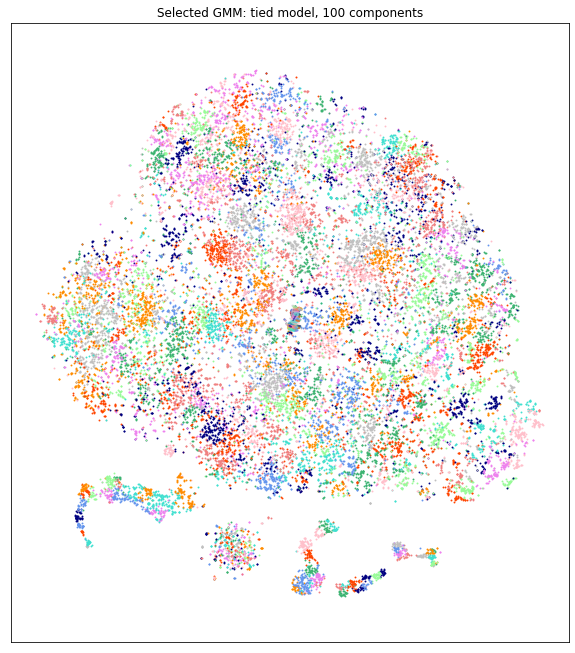

In [161]:
fig = plt.figure(figsize=(10, 10))
fsizeinit = plt.rcParams['figure.figsize']
#plt.rcParams['figure.figsize'] = 15,15
Y_4 = clf.predict(g2v_reduc)
#splot = plt.subplot(figure=fig)
splot = plt.axes()
colors = []
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_4 == i):
        continue
    plt.scatter(g2v_tsne.iloc[Y_4 == i, 0], g2v_tsne.iloc[Y_4 == i, 1], 0.8, color=color)
    colors.append(color)
    # Plot an ellipse to show the Gaussian component
    #angle = np.arctan2(w[0][1], w[0][0])
    #angle = 180.0 * angle / np.pi  # convert to degrees
    #v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    #ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
    #ell.set_clip_box(splot.bbox)
    #ell.set_alpha(0.5)
    #splot.add_artist(ell)
make_ellipses(clf, splot, colors)
plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()
plt.rcParams['figure.figsize'] = fsizeinit

In [167]:
import utilsClust

In [169]:
mm_ = utilsClust.lab2mat(Y_4, g2v_reduc.index)

In [173]:
table_ = np.sum(mm_, axis=0)

In [179]:
sum(table_<10)

84

## Gene2vec membership matrix

In [7]:
g2v_gmm = GaussianMixture(n_components=200, covariance_type='full', init_params= "kmeans", n_init=10)
g2v_gmm.fit(g2v)

GaussianMixture(n_components=200, n_init=10)

In [13]:
g2v_Y = g2v_gmm.predict(g2v)

In [35]:
GM_g2v_200_full = misc.lab2mat(g2v_Y, genes=g2v.index)

In [42]:
GM_g2v_200_full.to_csv("/home/ldap/ipellet/Documents/Clustering/ModuleMatrix/GM_g2v_200_full.csv",
                       header=False, index=True)

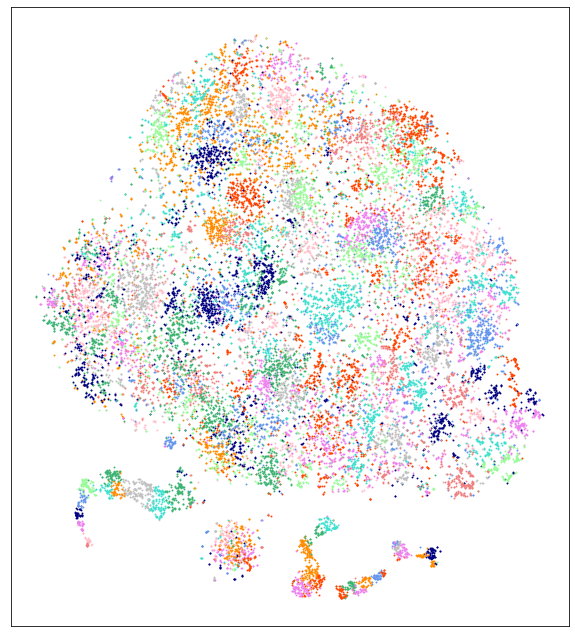

In [16]:
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange", 
                              "orangered", "palegreen","pink","violet","silver","mediumseagreen",
                             "lightcoral"])
fsizeinit = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=(10, 10))
splot = plt.axes()
colors = []
for i, (mean, cov, color) in enumerate(zip(g2v_gmm.means_, g2v_gmm.covariances_, color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(g2v_Y == i):
        continue
    plt.scatter(g2v_tsne.iloc[g2v_Y == i, 0], g2v_tsne.iloc[g2v_Y == i, 1], 0.8, color=color)
    colors.append(color)
#make_ellipses(g2v_gmm, splot, colors)
plt.xticks(())
plt.yticks(())
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()
plt.rcParams['figure.figsize'] = fsizeinit